In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date

In [22]:
start = '2010-01-01'
end = date.today().strftime("%Y-%m-%d")

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [23]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-14,213.850006,215.169998,211.300003,212.490005,212.490005,70122700
2024-06-17,213.369995,218.949997,212.720001,216.669998,216.669998,93728300
2024-06-18,217.589996,218.630005,213.000000,214.289993,214.289993,79943300
2024-06-20,213.929993,214.240005,208.850006,209.679993,209.679993,86172500
2024-06-21,210.389999,211.889999,207.110001,207.490005,207.490005,241805100


In [24]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [25]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


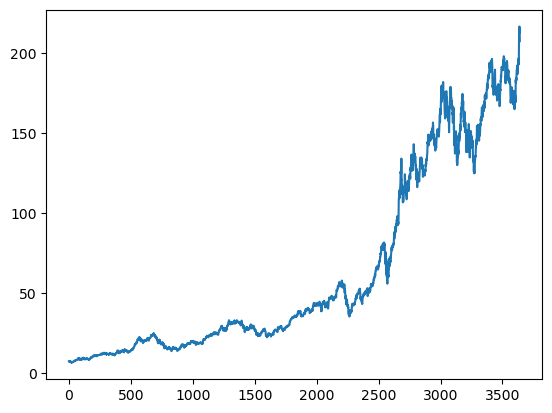

In [26]:
plt.plot(df.Close)

In [27]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3636    181.3998
3637    181.6215
3638    181.8227
3639    181.9953
3640    182.1529
Name: Close, Length: 3641, dtype: float64

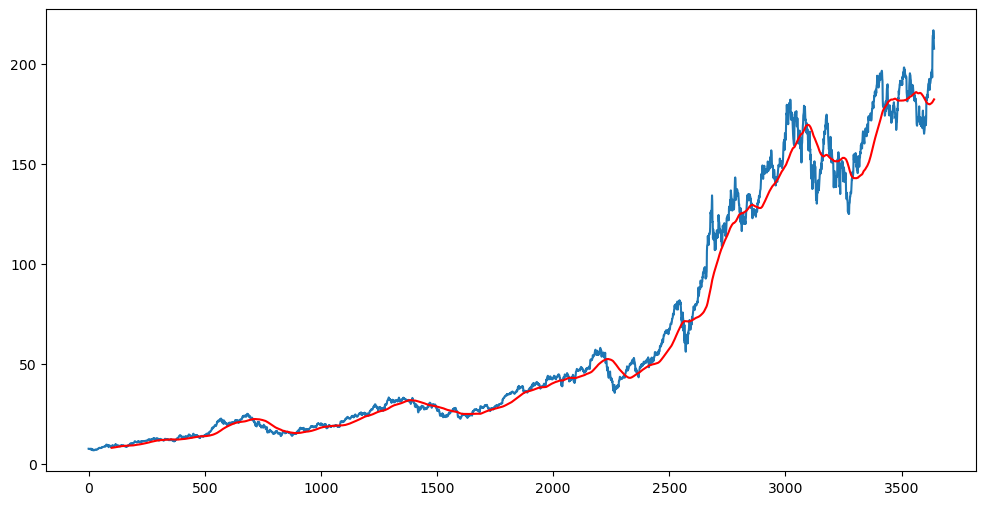

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [29]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3636    182.42425
3637    182.56935
3638    182.70145
3639    182.80255
3640    182.89150
Name: Close, Length: 3641, dtype: float64

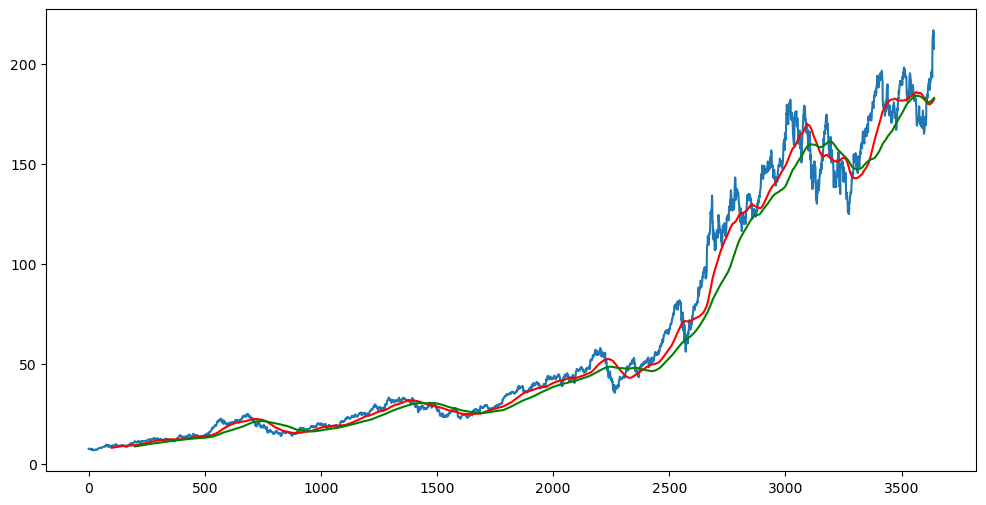

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [31]:
# Chia tập dữ liệu thành training_set và testing_set
n1 = int(len(df)*0.70)
n2 = int(len(df)*0.15)

data_training = pd.DataFrame(df['Close'][0:n1])
data_validating = pd.DataFrame(df['Close'][n1:(n1+n2)])
data_testing = pd.DataFrame(df['Close'][(n1+n2):])

print(data_training.shape)
print(data_validating.shape)
print(data_testing.shape)


(2548, 1)
(546, 1)
(547, 1)


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [33]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.99222717],
       [0.9924941 ],
       [0.97264513]])

In [34]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)    

In [35]:
x_train.shape

(2448, 100, 1)

In [36]:
days = data_training.tail(100)
data_validating = pd.concat([days, data_validating], ignore_index=True)

In [37]:
data_valiadating_array = scaler.fit_transform(data_validating)
data_valiadating_array

array([[4.33995441e-03],
       [2.10123744e-03],
       [0.00000000e+00],
       [1.01134955e-02],
       [1.13310344e-02],
       [2.74929103e-04],
       [3.92757573e-03],
       [1.60833975e-02],
       [1.61815928e-02],
       [1.09579099e-02],
       [1.61226816e-02],
       [2.21318677e-02],
       [3.41502698e-02],
       [3.34825592e-02],
       [3.24024998e-02],
       [3.05368774e-02],
       [3.23239315e-02],
       [3.45430214e-02],
       [4.25945337e-02],
       [4.15144743e-02],
       [4.78378437e-02],
       [4.86233768e-02],
       [5.45147404e-02],
       [5.93652988e-02],
       [4.80538615e-02],
       [4.79949503e-02],
       [5.87957836e-02],
       [7.26601511e-02],
       [7.59593003e-02],
       [7.52327084e-02],
       [7.54486963e-02],
       [7.97493965e-02],
       [8.11437290e-02],
       [8.51891273e-02],
       [8.47177774e-02],
       [8.96469041e-02],
       [8.60531987e-02],
       [9.21802073e-02],
       [9.48116758e-02],
       [9.32210124e-02],


In [38]:
x_val = []
y_val = []

for i in range(100, data_valiadating_array.shape[0]):
    x_val.append(data_valiadating_array[i-100:i])
    y_val.append(data_valiadating_array[i, 0])

x_val, y_val = np.array(x_val), np.array(y_val)    

In [39]:
x_val.shape

(546, 100, 1)

In [40]:
# Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner.tuners import RandomSearch


def build_model(hp):
    model = Sequential()

    # Number of Bidirectional LSTM layers
    num_lstm_layers = hp.Int('num_lstm_layers', min_value=1, max_value=3, default=1)
    for i in range(num_lstm_layers):
        model.add(Bidirectional(LSTM(units=hp.Int(f'units_lstm_{i}', min_value=32, max_value=256), return_sequences=True)))
        model.add(Dropout(rate=hp.Float(f'dropout_lstm_{i}', min_value=0.0, max_value=0.5)))

    # Number of Conv1D layers
    num_conv_layers = hp.Int('num_conv_layers', min_value=0, max_value=2, default=1)
    for i in range(num_conv_layers):
        model.add(Conv1D(filters=hp.Int(f'filters_conv_{i}', min_value=32, max_value=128),
                         kernel_size=hp.Int(f'kernel_size_conv_{i}', min_value=3, max_value=5),
                         activation='relu'))
        model.add(MaxPooling1D(pool_size=2))

    model.add(Flatten())

    # Number of Dense layers
    num_dense_layers = hp.Int('num_dense_layers', min_value=1, max_value=3, default=1)
    for i in range(num_dense_layers):
        model.add(Dense(units=hp.Int(f'units_dense_{i}', min_value=32, max_value=512), activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_dense_{i}', min_value=0.0, max_value=0.5)))

    # Output layer
    model.add(Dense(units=1, activation='relu'))

    # Compile model
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])
    
    return model

# Define the tuner (RandomSearch)
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=1,
    directory='random_search',
    project_name='AAPL_Model7___RS-HCNN-BiLSTM')

# Perform hyperparameter tuning
tuner.search(x=x_train,
             y=y_train,
             epochs=50,
             batch_size=32,
             validation_data=(x_val, y_val))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 03m 44s]
val_mean_absolute_error: 0.033649951219558716

Best val_mean_absolute_error So Far: 0.026143481954932213
Total elapsed time: 01h 08m 16s


c:\Users\AD\miniconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 54 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [41]:
sample_input = np.random.random((1, x_train.shape[1], 1))
best_model(sample_input)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.6285457]], dtype=float32)>

In [42]:
best_model.save(r'D:\20232\MI4216 Hệ hỗ trợ quyết định\Project_DSS\Project\Models\AAPL_Model7___RS-HCNN-BiLSTM.keras')

In [43]:
data_testing.head()

,Close
3094,167.399994
3095,167.229996
3096,166.419998
3097,161.789993
3098,162.880005


In [44]:
past_100_days = data_validating.tail(100)

In [45]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [46]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.97054080e-01],
       [4.02836936e-01],
       [3.46863070e-01],
       [3.84288143e-01],
       [4.39498153e-01],
       [4.33715297e-01],
       [4.22695005e-01],
       [4.01745762e-01],
       [4.39716421e-01],
       [5.03655158e-01],
       [5.46208449e-01],
       [5.40534644e-01],
       [5.93889792e-01],
       [5.53409798e-01],
       [5.38025143e-01],
       [5.92253197e-01],
       [5.15439139e-01],
       [5.03218789e-01],
       [4.88052402e-01],
       [5.23404343e-01],
       [5.52318624e-01],
       [5.59301705e-01],
       [6.03491590e-01],
       [5.92143980e-01],
       [5.93126103e-01],
       [5.80250948e-01],
       [5.73377085e-01],
       [6.21822116e-01],
       [5.96617560e-01],
       [5.44462637e-01],
       [5.12602319e-01],
       [5.14457182e-01],
       [5.14675450e-01],
       [5.46208449e-01],
       [5.51118399e-01],
       [5.14675450e-01],
       [5.24277249e-01],
       [4.88597989e-01],
       [4.49645373e-01],
       [4.30878311e-01],


In [47]:
input_data.shape

(647, 1)

In [48]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)    

In [49]:
print(x_test.shape)
print(y_test.shape)

(547, 100, 1)
(547,)


In [50]:
# Making predictions
y_predicted = best_model.predict(x_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step


In [51]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [52]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
mape = (np.abs((y_test - y_predicted) / y_test).mean()) * 100
r2 = r2_score(y_test, y_predicted)

# Đánh giá mô hình
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')
print(f'R²: {r2}')

MAE: 3.702142091294311
MSE: 21.34853201655837
RMSE: 4.620447166298774
MAPE: 2.2617611057658906%
R²: 0.9432203446434211


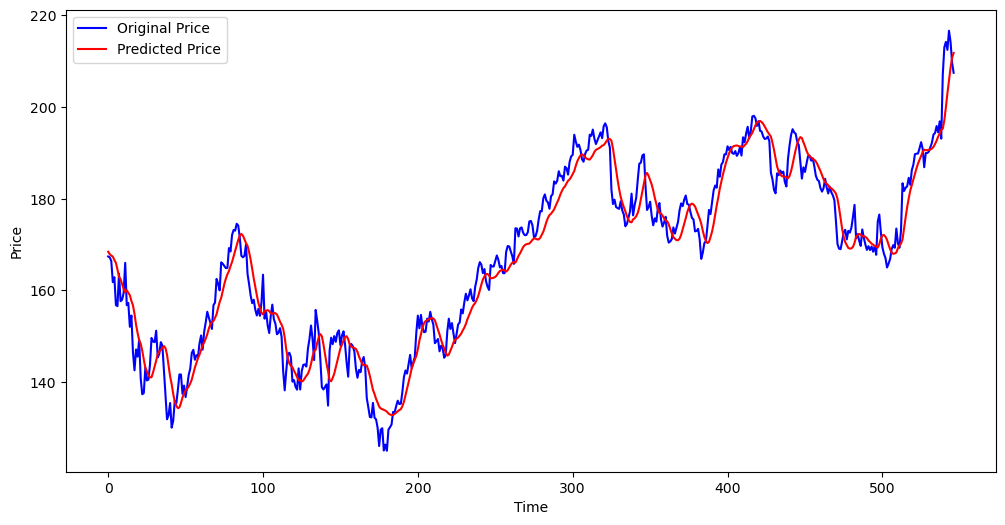

In [53]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()